<a href="https://colab.research.google.com/github/vncecruz/Emptech-2/blob/main/Cruz_Hands_on_Activity_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission Details

Name: Vince Joseph B. Cruz<br>
Course and Section: CPE 019-CPE32S1 - Emerging Technologies 2 in CpE <br>
Date of Submission: July 10, 2024 <br>
Instructor: Engr. Roman Richard<br>

---

**Explain your datasets and the problem being addressed.**

The study focuses on classifying grapevine leaves into five species using deep learning and SVM techniques. It employs a fine-tuned MobileNetv2 CNN model for initial feature extraction from leaf images, followed by SVM classification using various kernels. Feature selection with the Chi-Squares method enhances classification accuracy, achieving a notable 97.60% success rate by reducing the dimensionality of extracted features from MobileNetv2's Logits layer.

https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import time
start_time = time.time()

# baseline cnn model for mnist
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.layers import SeparableConv2D

In [15]:
import zipfile
import glob
import numpy as np
from skimage.io import imread
from skimage.transform import resize

path = '/content/drive/MyDrive/Emptech/grapevineleaves.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('path for extracted images')

In [20]:
import cv2
import os
import numpy as np

parent_folder_path = '/content/path for extracted images/Grapevine_Leaves_Image_Dataset'

processed_images = []
labels = []

target_size = (200, 200)

for class_name in os.listdir(parent_folder_path):
    class_folder_path = os.path.join(parent_folder_path, class_name)
    if os.path.isdir(class_folder_path):
        for filename in os.listdir(class_folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(class_folder_path, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size)
                    image_array = np.array(resized_image, dtype=np.float32) / 255.0
                    processed_images.append(image_array)
                    labels.append(class_name)

if len(processed_images) == 0:
    print("No images were found or processed.")
else:
    processed_images = np.array(processed_images)
    labels = np.array(labels)

    label_dict = {class_name: idx for idx, class_name in enumerate(np.unique(labels))}
    num_classes = len(label_dict)

    labels_num = np.array([label_dict[label] for label in labels])
    labels_one_hot = to_categorical(labels_num, num_classes=num_classes)

    trainX, testX, trainY, testY = train_test_split(processed_images, labels_one_hot, test_size=0.2, random_state=1)

**create a baseline model of the CNN**

Epoch 1/10
13/13 [==============================] - 36s 3s/step - loss: 12.2322 - accuracy: 0.2250 - val_loss: 1.6137 - val_accuracy: 0.1700
Epoch 2/10
13/13 [==============================] - 31s 2s/step - loss: 1.6058 - accuracy: 0.2650 - val_loss: 1.6041 - val_accuracy: 0.3000
Epoch 3/10
13/13 [==============================] - 33s 3s/step - loss: 1.5627 - accuracy: 0.4100 - val_loss: 1.5887 - val_accuracy: 0.2700
Epoch 4/10
13/13 [==============================] - 36s 3s/step - loss: 1.4742 - accuracy: 0.3825 - val_loss: 1.5791 - val_accuracy: 0.3100
Epoch 5/10
13/13 [==============================] - 29s 2s/step - loss: 1.2561 - accuracy: 0.5450 - val_loss: 1.5383 - val_accuracy: 0.4000
Epoch 6/10
13/13 [==============================] - 31s 2s/step - loss: 0.8462 - accuracy: 0.7300 - val_loss: 1.6266 - val_accuracy: 0.3300
Epoch 7/10
13/13 [==============================] - 31s 2s/step - loss: 0.8463 - accuracy: 0.7625 - val_loss: 1.6076 - val_accuracy: 0.2100
Epoch 8/10
13/13 [=

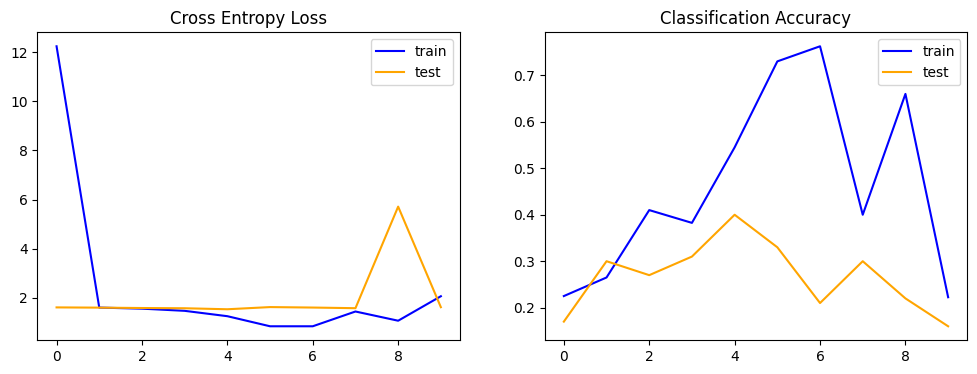

In [21]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model()

history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)

_, acc = model.evaluate(testX, testY, verbose=0)
print(f'> Accuracy: {acc * 100.0:.3f}%')

def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

plot_learning_curves(history)

**Perform image augmentation**

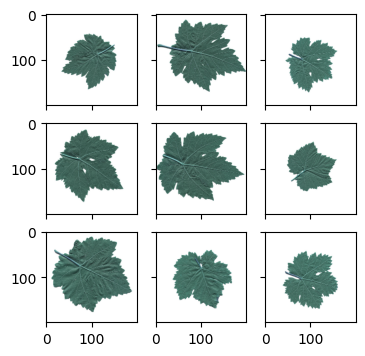

In [17]:
fig, ax = pyplot.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(processed_images[i*3+j], cmap=pyplot.get_cmap("gray"))
pyplot.show()

**Perform feature standardization**

-1.7358295 0.007111546 1.7244416


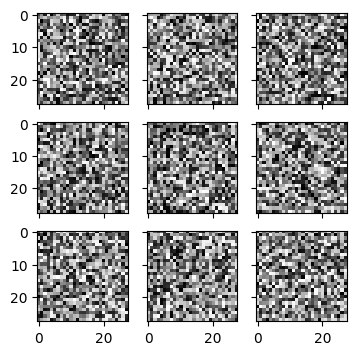

In [27]:
X_train = np.random.rand(100, 28, 28, 1)
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, np.zeros(len(X_train)), batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].squeeze(), cmap=plt.get_cmap("gray"))
    plt.show()
    break

**Perform ZCA whitening of your images**

-22.33768 0.018561518 8.971643


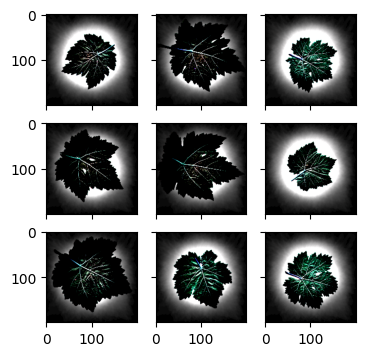

In [30]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.mean = processed_images.mean(axis=0)
datagen.std = processed_images.std(axis=0)
for X_batch, y_batch in datagen.flow(processed_images, labels, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    fig, ax = pyplot.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

**Augment data with random rotations, shifts, and flips**

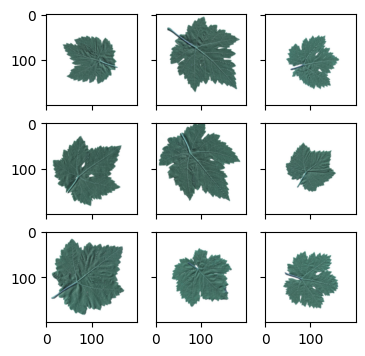

In [31]:
# Random Rotations
datagen = ImageDataGenerator(rotation_range=90)
for X_batch, y_batch in datagen.flow(processed_images, labels, batch_size=9, shuffle=False):
    fig, ax = pyplot.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

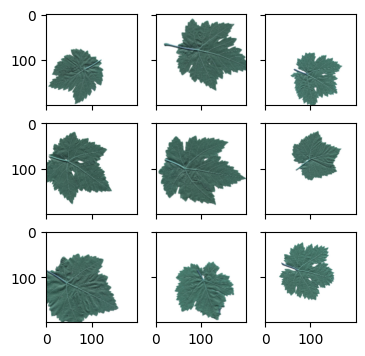

In [32]:
# Random Shifts
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
for X_batch, y_batch in datagen.flow(processed_images, labels, batch_size=9, shuffle=False):
    fig, ax = pyplot.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

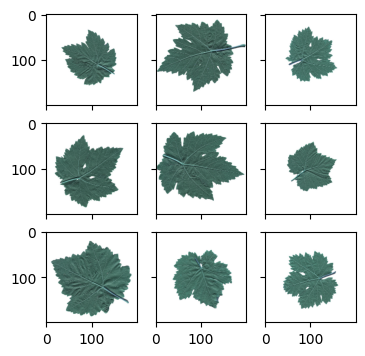

In [33]:
# Random Flips
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
for X_batch, y_batch in datagen.flow(processed_images, labels, batch_size=9, shuffle=False):
    fig, ax = pyplot.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

**Save augmented image data to disk**

In [39]:
rotation_range = 90
shift = 0.2
datagen_rotation = ImageDataGenerator(rotation_range=rotation_range)
datagen_shift = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen_flip = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

save_dir_rotation = 'augmented_images_rotation'
save_dir_shift = 'augmented_images_shift'
save_dir_flip = 'augmented_images_flip'

for save_dir in [save_dir_rotation, save_dir_shift, save_dir_flip]:
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

def save_augmented_images(datagen, save_dir, prefix):
    batch_size = 9
    for X_batch, y_batch in datagen.flow(processed_images, labels, batch_size=batch_size, shuffle=False,
                                         save_to_dir=save_dir, save_prefix=prefix, save_format='png'):
        fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
        for i in range(3):
            for j in range(3):
                ax[i][j].imshow(X_batch[i * 3 + j], cmap=plt.get_cmap("gray"))
        plt.show()
        break

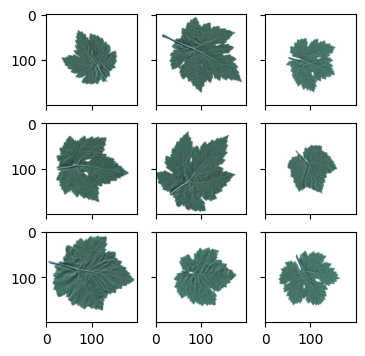

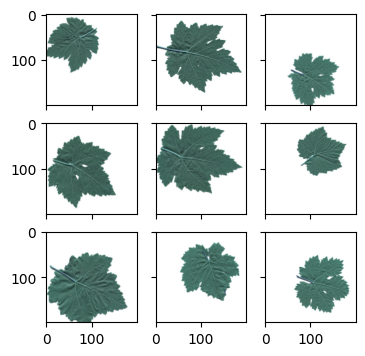

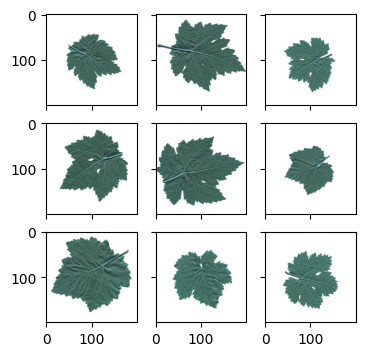

In [40]:
save_augmented_images(datagen_rotation, save_dir_rotation, 'rot')

save_augmented_images(datagen_shift, save_dir_shift, 'shift')

save_augmented_images(datagen_flip, save_dir_flip, 'flip')

**Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task**

> Accuracy: 16.000%


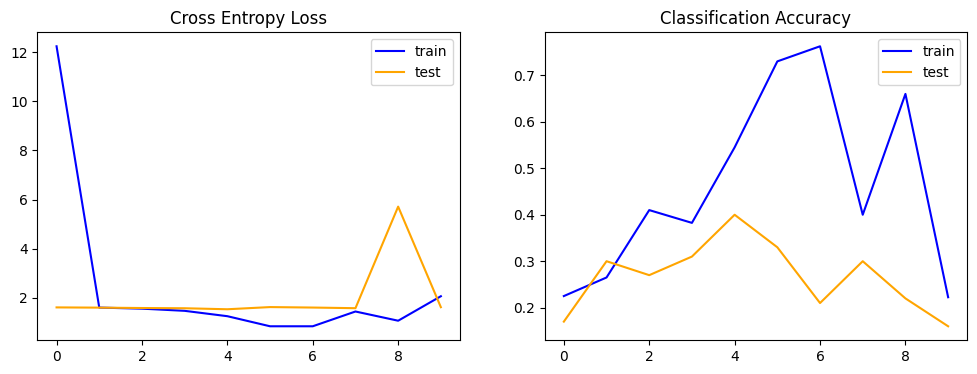

In [43]:
# Evaluating the model
_, acc = model.evaluate(testX, testY, verbose=0)
print(f'> Accuracy: {acc * 100.0:.3f}%')

# Function to plot learning curves
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# Plotting learning curves
plot_learning_curves(history)


**Explore extensions to a baseline model to improve learning and model capacity.**

Epoch 1/10
13/13 [==============================] - 42s 3s/step - loss: 5.6252 - accuracy: 0.2050 - val_loss: 1.6250 - val_accuracy: 0.1600
Epoch 2/10
13/13 [==============================] - 40s 3s/step - loss: 1.6134 - accuracy: 0.2025 - val_loss: 1.6106 - val_accuracy: 0.1700
Epoch 3/10
13/13 [==============================] - 47s 4s/step - loss: 1.6051 - accuracy: 0.2125 - val_loss: 1.6112 - val_accuracy: 0.1600
Epoch 4/10
13/13 [==============================] - 39s 3s/step - loss: 1.5976 - accuracy: 0.2700 - val_loss: 1.6046 - val_accuracy: 0.1600
Epoch 5/10
13/13 [==============================] - 42s 3s/step - loss: 1.5805 - accuracy: 0.2800 - val_loss: 1.6012 - val_accuracy: 0.3000
Epoch 6/10
13/13 [==============================] - 39s 3s/step - loss: 1.5577 - accuracy: 0.2950 - val_loss: 1.5634 - val_accuracy: 0.3200
Epoch 7/10
13/13 [==============================] - 42s 3s/step - loss: 1.5061 - accuracy: 0.3525 - val_loss: 1.6139 - val_accuracy: 0.2900
Epoch 8/10
13/13 [==

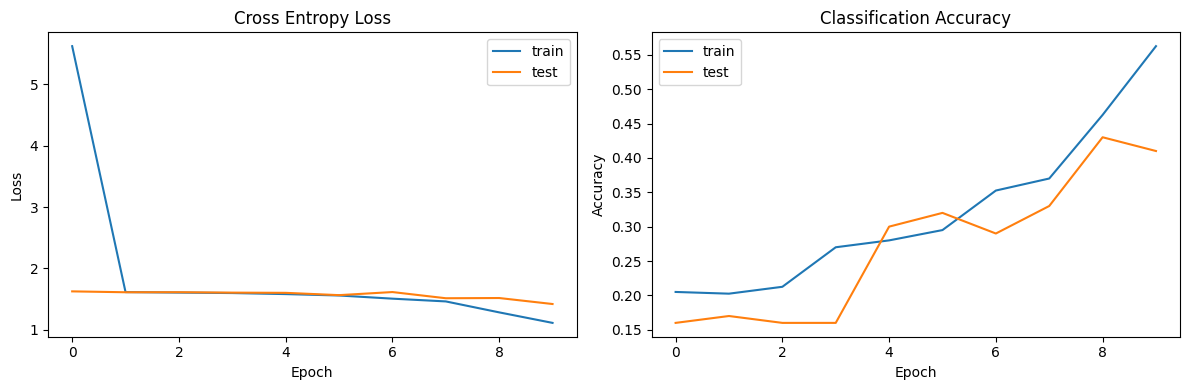

In [49]:
def define_deep_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

deep_model = define_deep_model()
deep_history = deep_model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
_, deep_acc = deep_model.evaluate(testX, testY, verbose=0)
print(f'> Deep Model Accuracy: {deep_acc * 100.0:.3f}%')
import matplotlib.pyplot as plt

def plot_diagnostic_learning_curves(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Cross Entropy Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_diagnostic_learning_curves(deep_history)

**Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.**

In [50]:
def define_final_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

final_model = define_final_model()

history = final_model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)

Epoch 1/10
13/13 [==============================] - 48s 4s/step - loss: 4.1598 - accuracy: 0.2125 - val_loss: 1.6171 - val_accuracy: 0.1700
Epoch 2/10
13/13 [==============================] - 41s 3s/step - loss: 1.6095 - accuracy: 0.2375 - val_loss: 1.6046 - val_accuracy: 0.1700
Epoch 3/10
13/13 [==============================] - 39s 3s/step - loss: 1.5982 - accuracy: 0.2600 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/10
13/13 [==============================] - 44s 3s/step - loss: 1.6151 - accuracy: 0.2000 - val_loss: 1.6114 - val_accuracy: 0.1600
Epoch 5/10
13/13 [==============================] - 47s 4s/step - loss: 1.6589 - accuracy: 0.2450 - val_loss: 1.6332 - val_accuracy: 0.2500
Epoch 6/10
13/13 [==============================] - 43s 3s/step - loss: 1.6692 - accuracy: 0.2575 - val_loss: 1.5959 - val_accuracy: 0.2300
Epoch 7/10
13/13 [==============================] - 41s 3s/step - loss: 1.6526 - accuracy: 0.2075 - val_loss: 1.6141 - val_accuracy: 0.1900
Epoch 8/10
13/13 [==

In [51]:
_, accuracy = final_model.evaluate(testX, testY, verbose=0)
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

Final Model Accuracy: 16.00%


In [54]:
image_path = '/content/146ea7174c4617237f8b3c53d18fea20.jpg'

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0
predictions = final_model.predict(img_array)

print(predictions)

1/1 [==============================] - 0s 87ms/step
[[0.23618639 0.18350266 0.1777283  0.19918104 0.20340167]]


# Conclusion

In this activity I learned about Convolutional Neural Network. Using the grapevine leaf dataset a baseline CNN model was created and improved through image augmentation, feature standardization, and ZCA whitening. Augmented the images including random rotations, shifts, and flips. In order to increase learning capacity extensions to the baseline model were used. The performace was evaulated to predict classification for new images.